#Import

In [15]:
from PIL import Image  # Import the Image module from Pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#MNIST classification using CNN model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8848 - loss: 0.3729 - val_accuracy: 0.9797 - val_loss: 0.0711
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9816 - loss: 0.0574 - val_accuracy: 0.9846 - val_loss: 0.0523
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9896 - loss: 0.0334 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9915 - loss: 0.0282 - val_accuracy: 0.9879 - val_loss: 0.0422
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9894 - val_loss: 0.0391
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


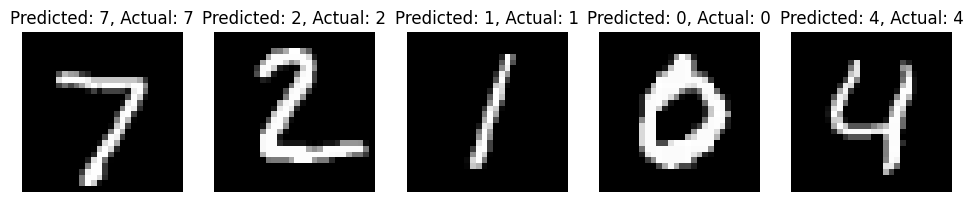

In [2]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the Data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Build a Simple CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Make Predictions on Test Set
predictions = model.predict(x_test)

# Display Sample Predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()


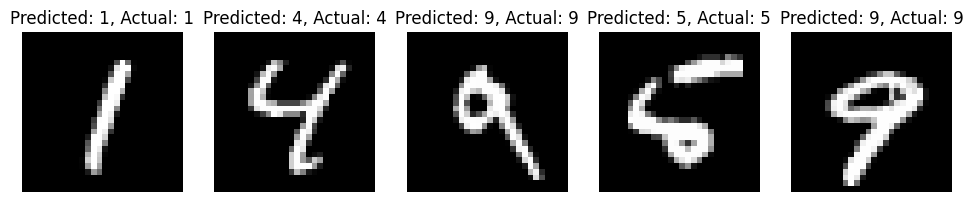

In [3]:
# Display Sample Predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i+5].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i+5]).numpy()}, Actual: {y_test[i+5]}")
    plt.axis('off')
plt.show()

#Object Detection

In [4]:
# Set up the environment
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install requirements

# Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5s model (small)


Cloning into 'yolov5'...
remote: Enumerating objects: 16995, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 16995 (delta 101), reused 117 (delta 59), pack-reused 16805 (from 1)
Receiving objects: 100% (16995/16995), 15.73 MiB | 18.55 MiB/s, done.
Resolving deltas: 100% (11634/11634), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-15 Python-3.10.12 torch-2.4.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 121MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
pip install requests


In [6]:
import requests

# Define the URL of the image
url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg'

# Send a GET request to the URL
response = requests.get(url)

# Open a file in binary write mode
with open('zidane.jpg', 'wb') as f:
    f.write(response.content)

print("Image downloaded successfully!")


Image downloaded successfully!


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-15 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


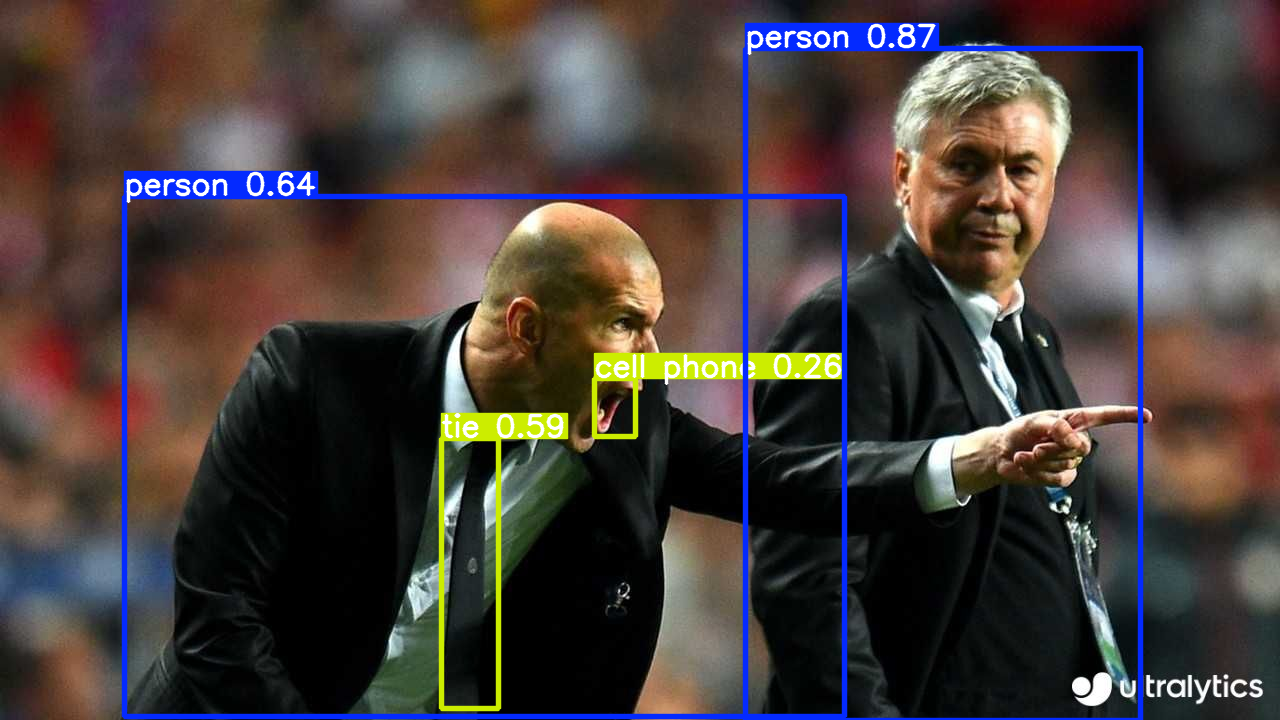

In [7]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load the image
img = 'zidane.jpg'  # path to your image

# Perform inference
results = model(img)

# Show results
results.show()  # This will display the image with detections


In [8]:
img_path = '/content/game of thrones.jpeg'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/game of thrones.jpeg'

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


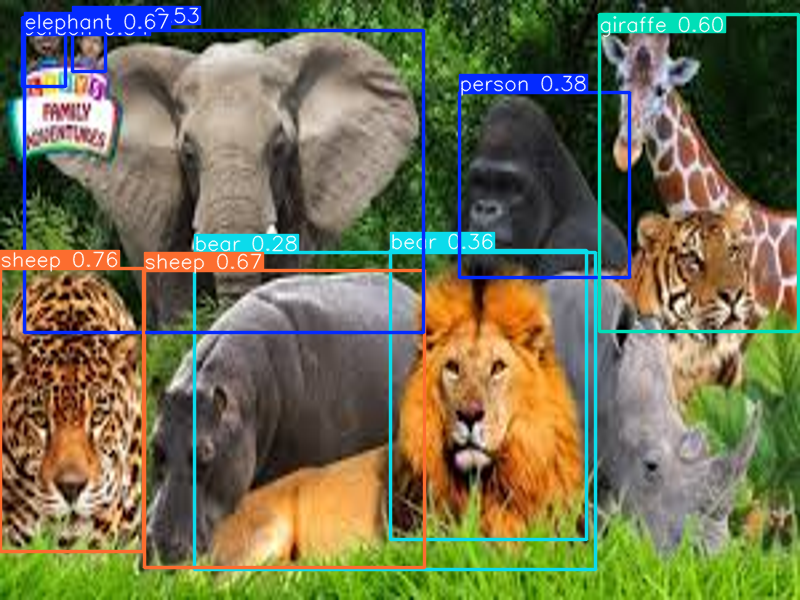

In [10]:
img_path = '/content/animals.jpeg'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


#Segmentation

In [ ]:
pip install tensorflow tensorflow-datasets matplotlib numpy


#HomeWork2

Run this cell first to load the required dataset

In [11]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Preprocess the Data
X = X / 255.0  # Normalize pixel values to [0, 1]
y = y.astype(np.uint8)  # Convert labels to integers

#  Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##Part1 : In this section, we want to classify the MNIST dataset using Random Forest, Logistic Regression, and Neural Networks. We will print the accuracy for each model. The code for Random Forest will serve as an example, and you should complete the code for Logistic Regression and Neural Networks accordingly.

In [12]:
# Train Different Classifiers

# 1. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [13]:
print(accuracy_rf)

0.9675


In [16]:
# 2. Logistic Regression
"""
Load and fit the Logistic Regression model here in two lines (hint :use machine learning note book)
"""
logistic_classifier = LogisticRegression(max_iter=200) #Train the Logistic Regression
logistic_classifier.fit(X_train, y_train) #Train the Logistic Regression

y_pred_logistic = logistic_classifier.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(accuracy_logistic)

0.9190714285714285


In [19]:
# 3. MLP (Neural Network)
"""
Load and fit the MLP (Neural Network) model here in two lines (hint :use machine learning note book)
"""

mlp = MLPClassifier(max_iter=1000) # Train the MLP
mlp.fit(X_train, y_train) # Train the MLP

y_pred_mlp = mlp.predict(X_test)


accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(accuracy_mlp)




0.9762142857142857


In [20]:
# Step 6: Print Accuracy Results
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print(f'MLP Accuracy: {accuracy_mlp * 100:.2f}%')

Logistic Regression Accuracy: 91.91%
Random Forest Accuracy: 96.75%
MLP Accuracy: 97.62%


## Part2: take a photo of yourself, upload it to the jupyter notebook and detect your face using Yolo model

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


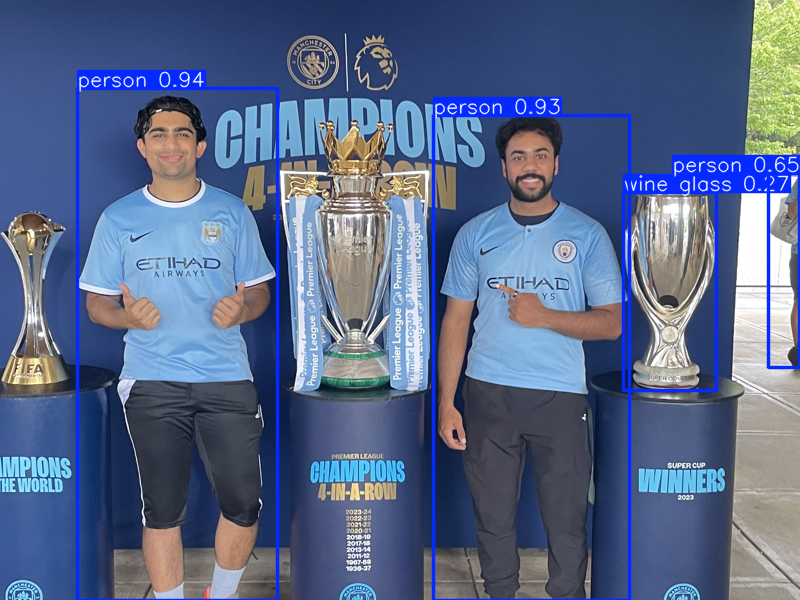

In [29]:
# your code here
img_path = '/content/CL_Trophy.JPG'  # path to your image
image = Image.open(img_path)

# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()
